In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# Data extraction - drug release curves

In [2]:
# results of best 15_feat model

LGBM = pd.read_pickle("NESTED_CV_RESULTS/LGBM_15_feat.pkl", compression='infer', storage_options=None)

In [3]:
LGBM.head(2)

Iter  Valid Score  Test Score  \
0     7     0.121688    0.122225   
1     2     0.125566    0.123820   

                                         Model Parms  \
0  {'subsample': 1.0, 'reg_lambda': 0.015, 'reg_a...   
1  {'subsample': 1.0, 'reg_lambda': 0.01, 'reg_al...   

                                           DP_Groups  \
0  [5-FU-PLGA, 5-FU-PLGA, 5-FU-PLGA, 5-FU-PLGA, 5...   
1  [CBD-PCL, CBD-PCL, CBD-PCL, CBD-PCL, CBD-PCL, ...   

                                  Experimental Index  \
0  [80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 8...   
1  [8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 91, 91, 91, ...   

                                                Time  \
0  [0.0, 0.260639, 1.05983, 2.08982, 3.11353, 4.1...   
1  [0.0, 0.119284294234592, 1.07355864811133, 1.9...   

                                Experimental_Release  \
0  [0.0, 0.066493, 0.402908, 0.569291, 0.685878, ...   
1  [0.0, 0.0577777777777779, 0.226666666666666, 0...   

                                   Predicted_Release  Score_difference  
0  [-0.002, 0.132, 0.376, 0.492, 0.584, 0.616, 0....          0.000537  
1  [0.008, 0.043, 0.236, 0.289, 0.422, 0.531, 0.5...          0.001746

In [4]:
def test_extraction(df, n):
    
    '''
    Function to extract data from results of the NESTED_CV experiments,
    then return the results for the indicated nested loop - these are ranked in order of score_differeent,
    where score difference is: inner_loop MAE (i.e., valid score) - outer loop MAE (i.e., test score)
    
    Takes arguments: (i) model_name and (ii) sorted nested loop number (i.e., "n")
    '''
    
    dataframe = pd.DataFrame(df['Time'][n], columns=['Time']) 
    dataframe['Experimental_Release'] = df['Experimental_Release'][n]
    dataframe['Predicted_Release'] = df['Predicted_Release'][n]
    #dataframe['Variance'] = dataframe['Variance'][n]
    dataframe['Experimental Index'] = df['Experimental Index'][n]
    dataframe['DP_Groups'] = df['DP_Groups'][n]
    
    return dataframe



## Outer loop #1

# Drug Release Curves

In [5]:
LGBM_test = test_extraction(LGBM, 0)
LGBM_test

Time  Experimental_Release  Predicted_Release  Experimental Index  \
0      0.000000              0.000000             -0.002                  80   
1      0.260639              0.066493              0.132                  80   
2      1.059830              0.402908              0.376                  80   
3      2.089820              0.569291              0.492                  80   
4      3.113530              0.685878              0.584                  80   
...         ...                   ...                ...                 ...   
1607   6.920690              0.456151              0.508                 108   
1608  14.102300              0.606239              0.747                 108   
1609  21.095600              0.812382              0.861                 108   
1610  27.986300              0.958191              0.920                 108   
1611  35.058100              0.974670              0.953                 108   

      DP_Groups  
0     5-FU-PLGA  
1     5-FU-PLGA  
2     5-FU-PLGA  
3     5-FU-PLGA  
4     5-FU-PLGA  
...         ...  
1607   TMZ-PLGA  
1608   TMZ-PLGA  
1609   TMZ-PLGA  
1610   TMZ-PLGA  
1611   TMZ-PLGA  

[1612 rows x 5 columns]

In [6]:
len(LGBM_test["DP_Groups"].unique())

7

/var/folders/mt/yx95qrc52gd2lj_yvl2b3wfw0000gp/T/ipykernel_5906/700555562.py:20: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(figsize=(8,5))


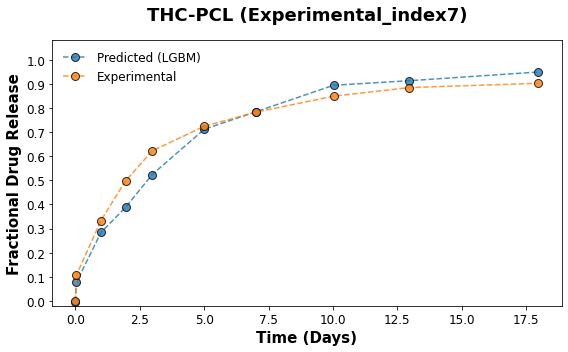

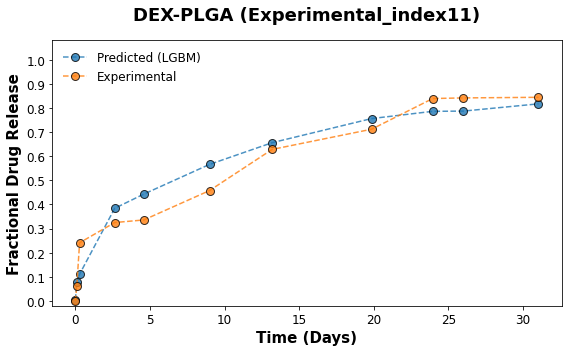

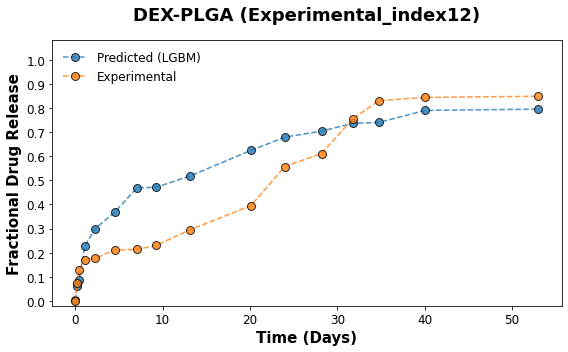

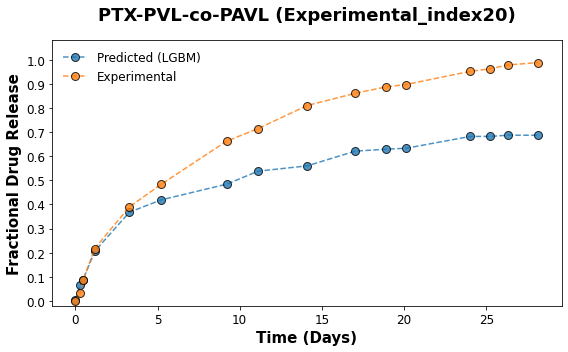

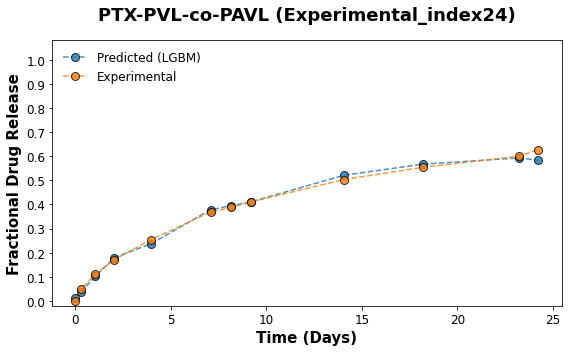

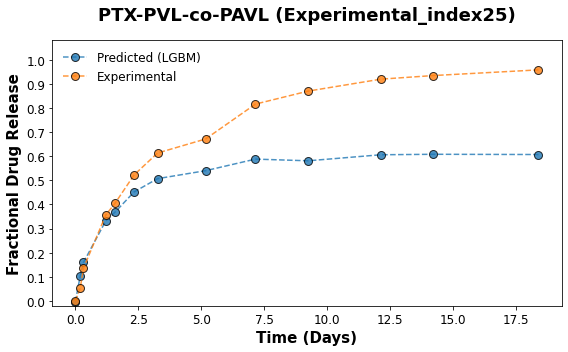

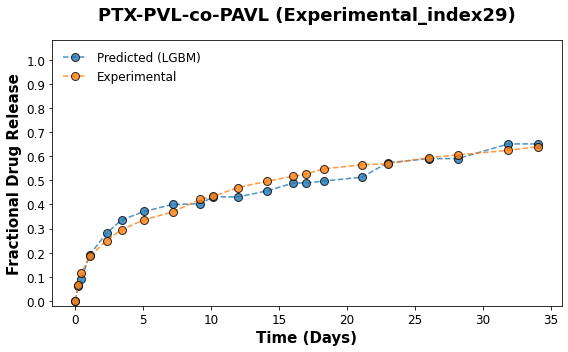

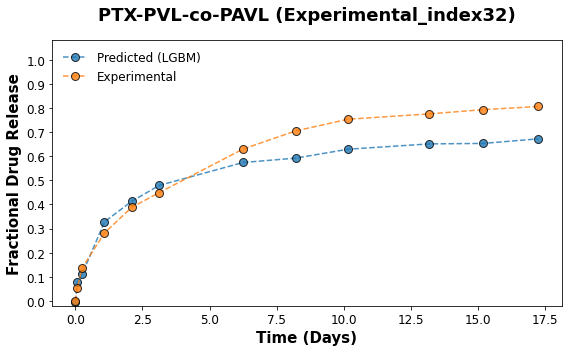

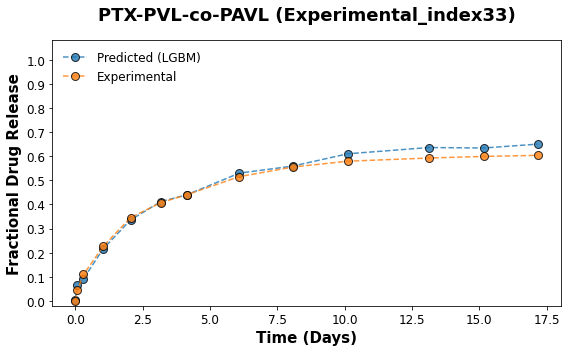

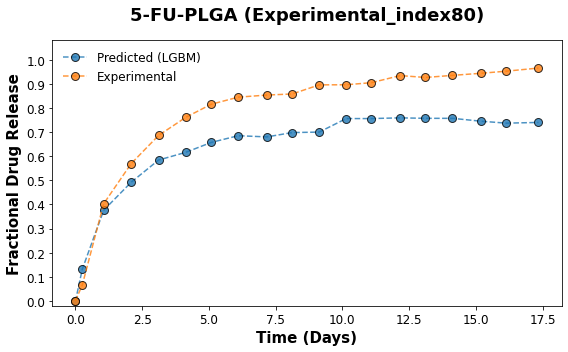

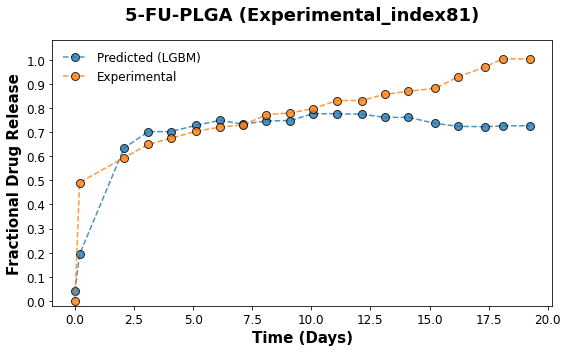

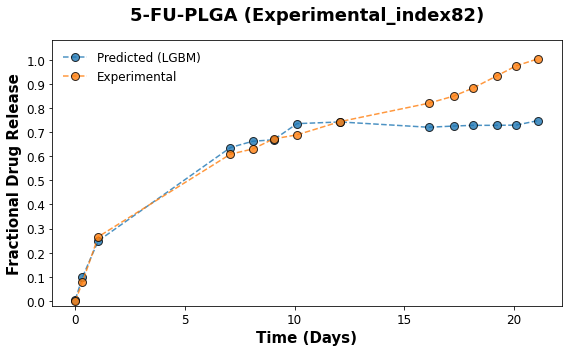

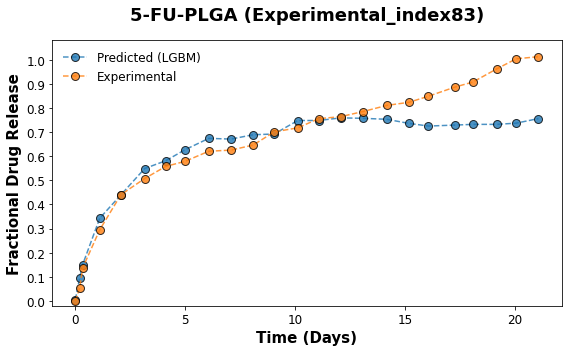

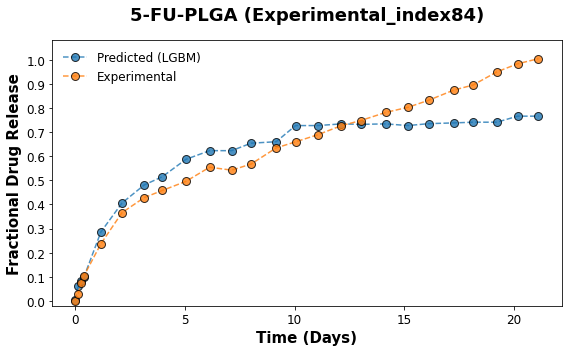

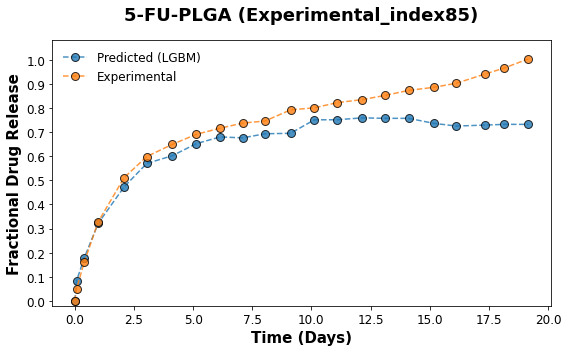

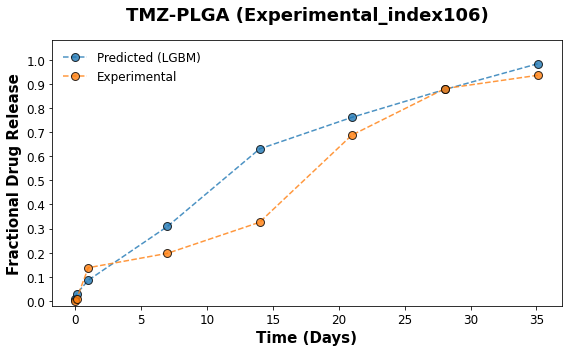

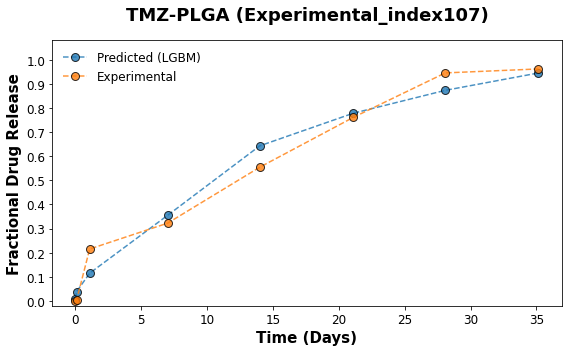

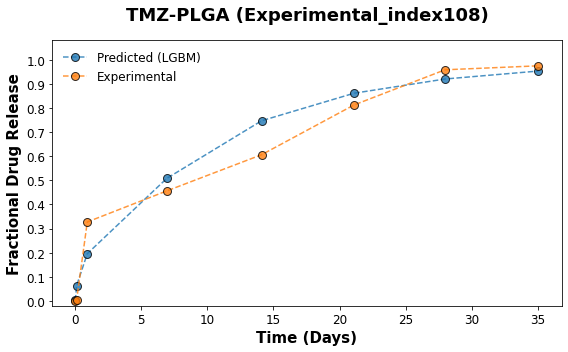

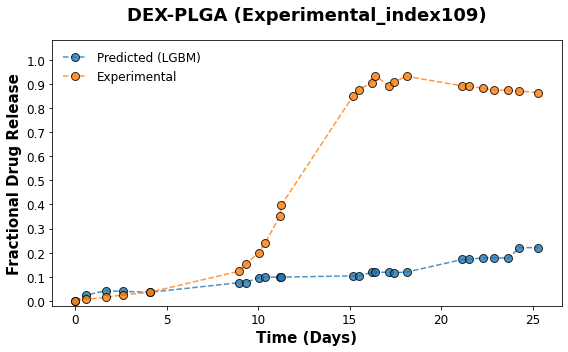

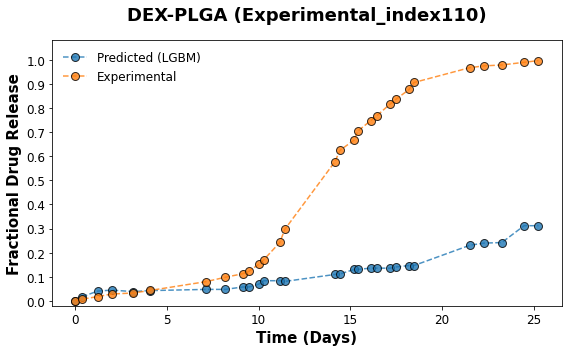

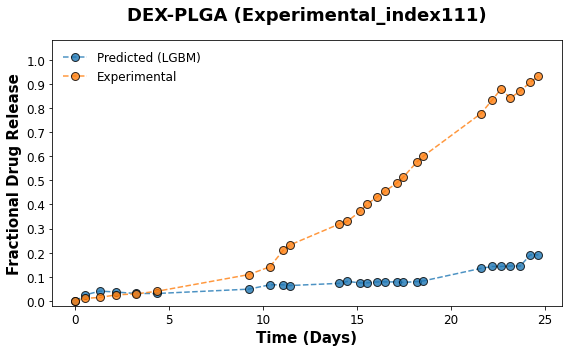

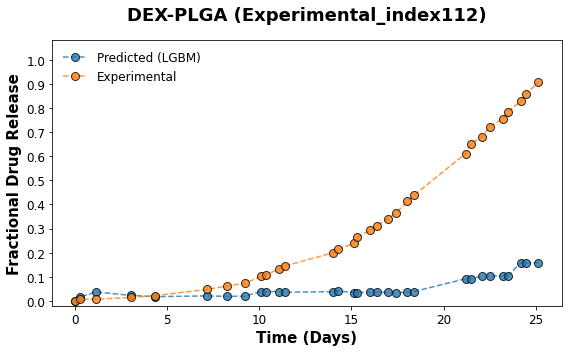

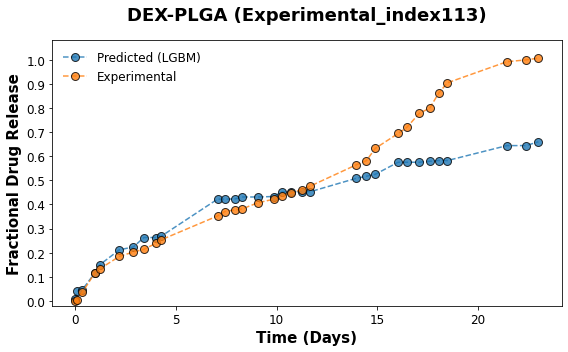

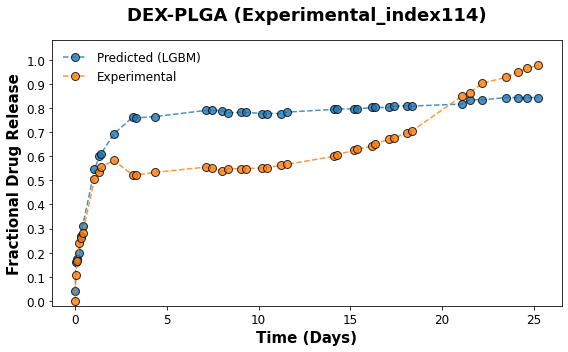

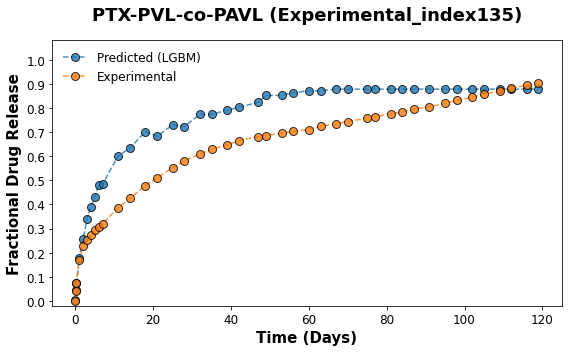

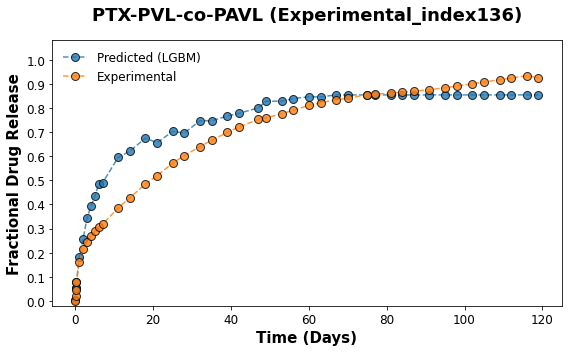

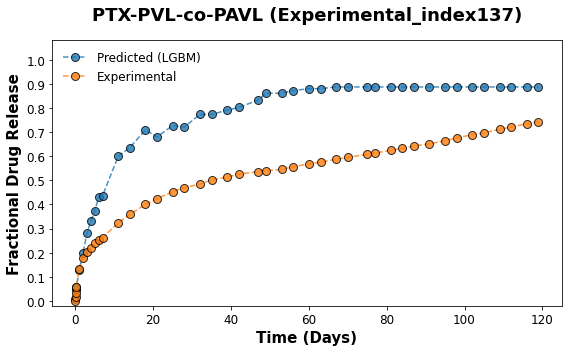

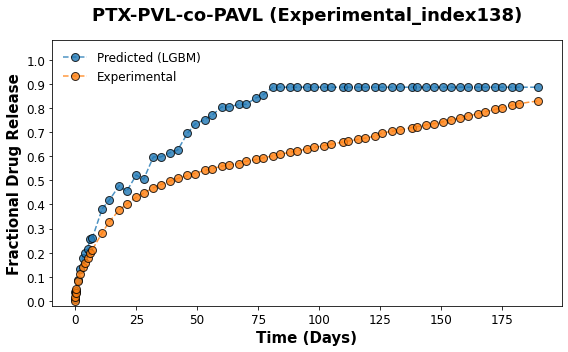

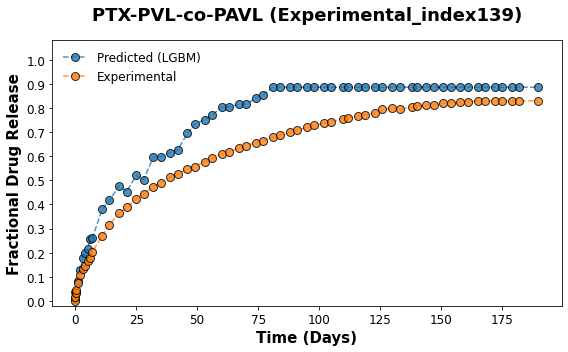

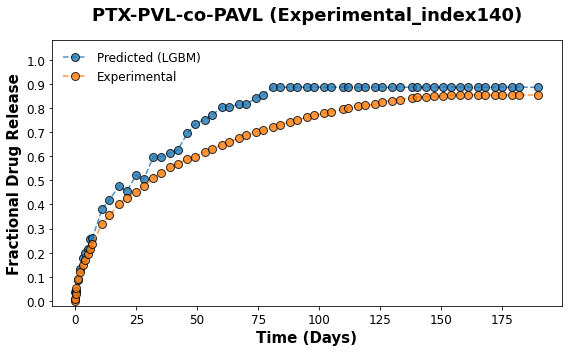

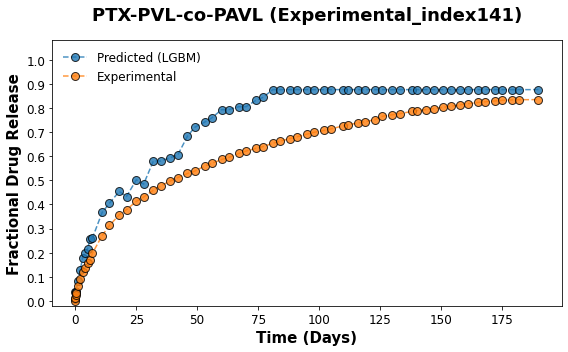

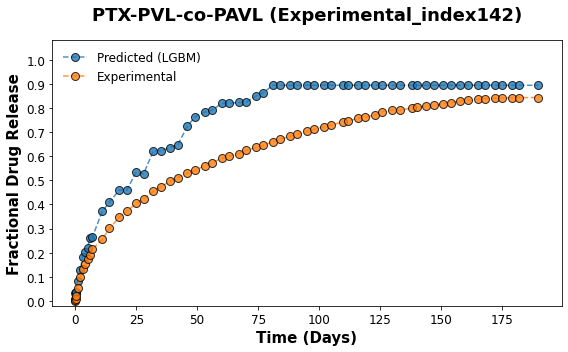

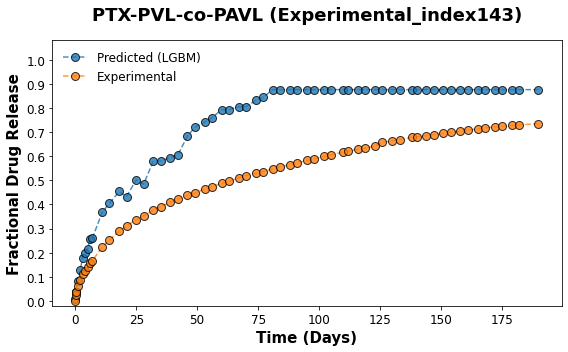

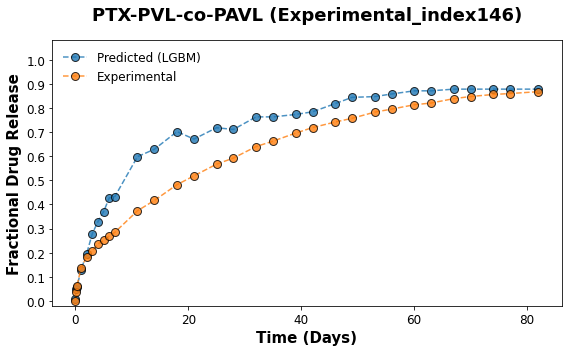

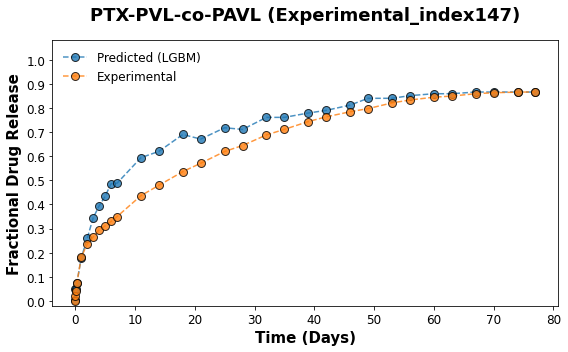

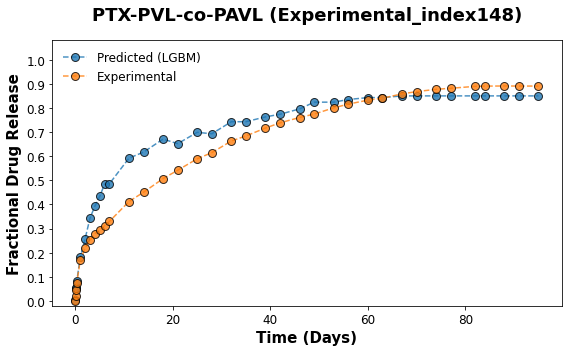

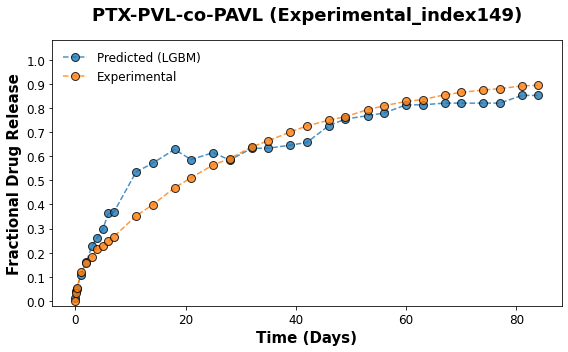

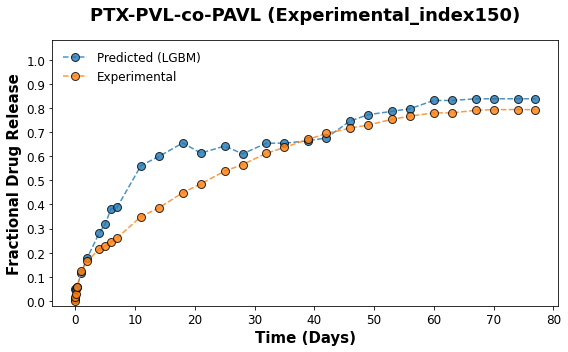

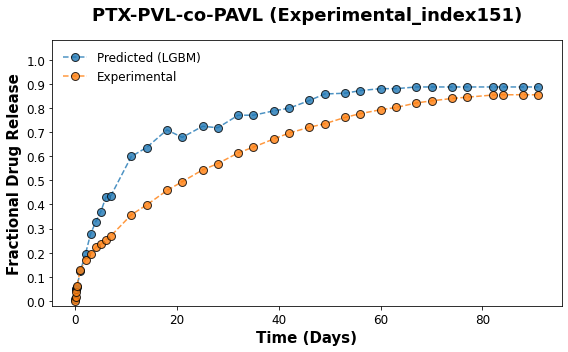

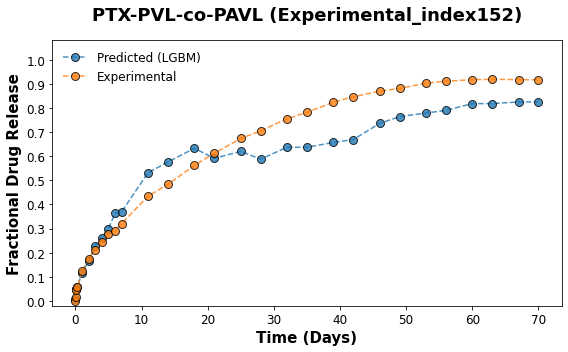

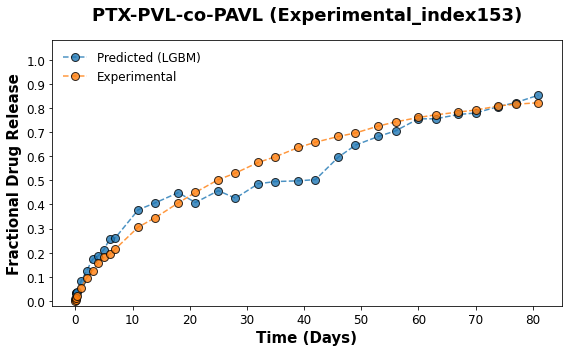

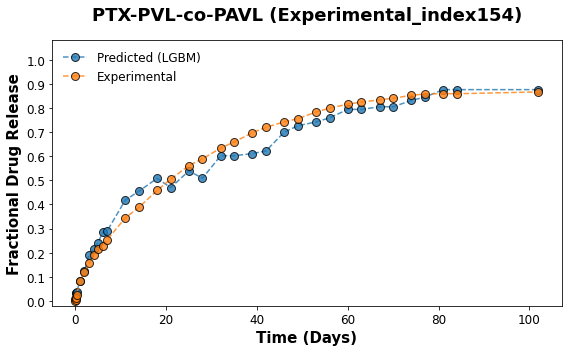

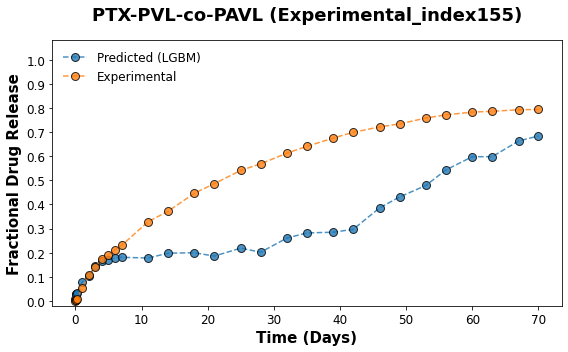

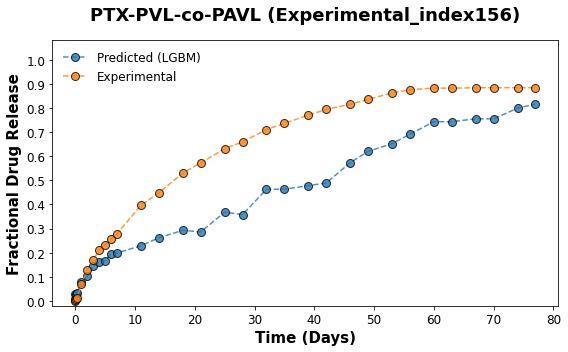

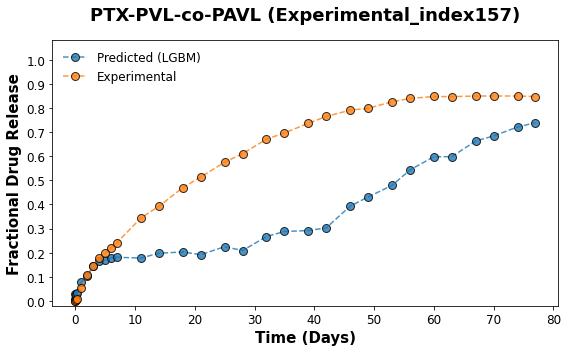

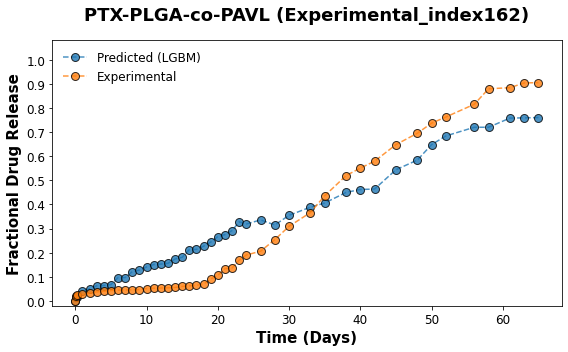

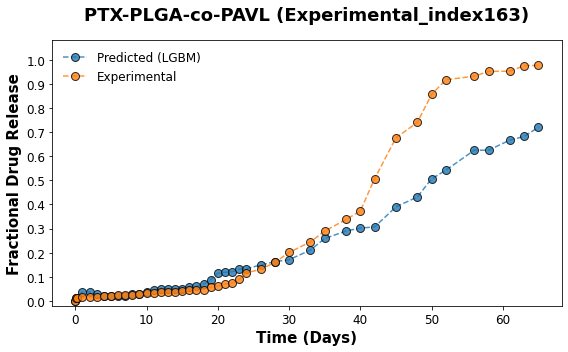

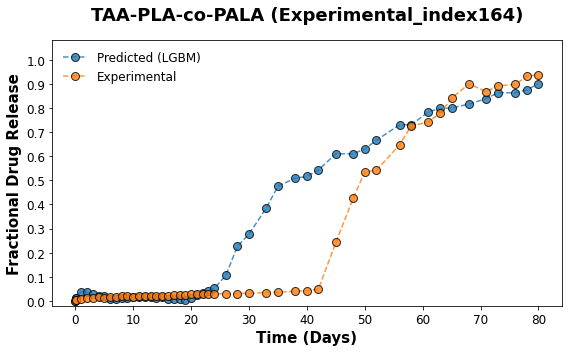

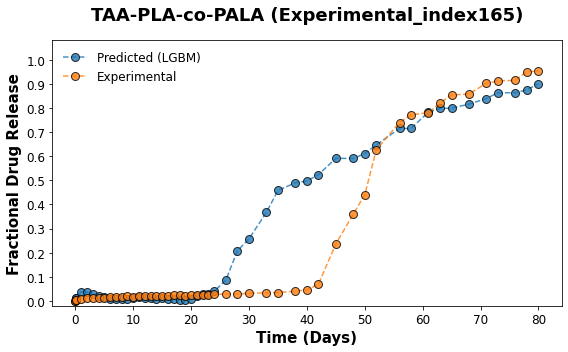

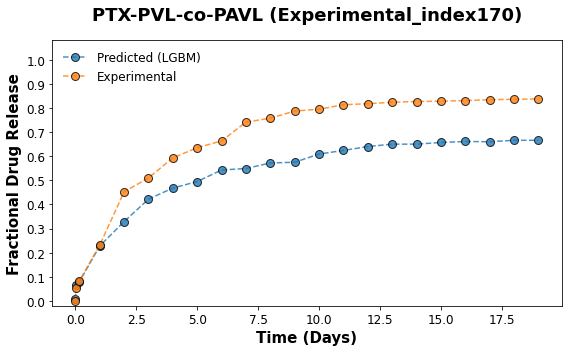

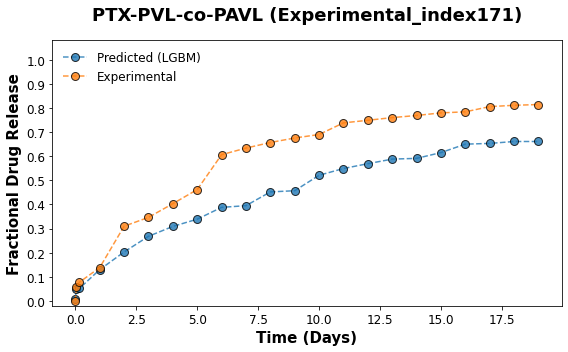

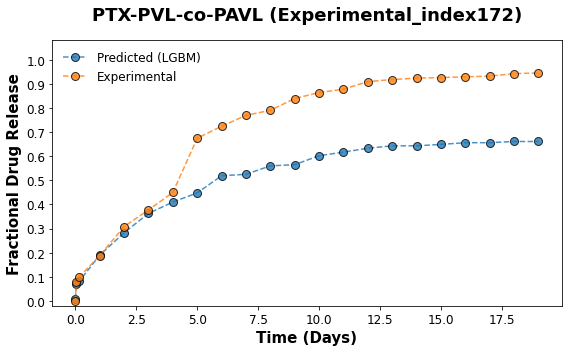

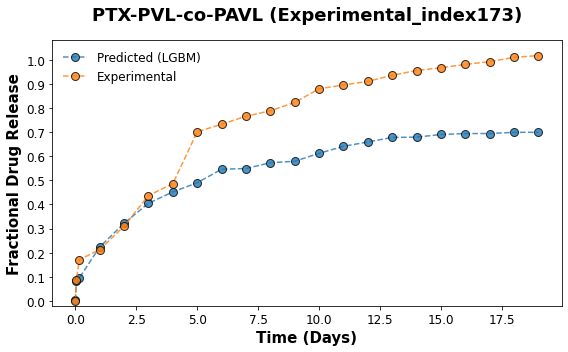

In [7]:
#group dataframe by experimental index
grouped = LGBM_test.groupby('Experimental Index')

#generate predicted versus experimental drug release profiles for the test set
for name, group in grouped:
    X1 = group['Time']
    Y1 = group['Predicted_Release']
    X2 = group['Time']
    Y2 = group['Experimental_Release']
    #Y1_err=group['Variance']
    
    dp = group['DP_Groups'].iloc[1]
    
    # Compute upper and lower bounds using chosen uncertainty measure: here
    # it is a fraction of the standard deviation of measurements at each
    # time point based on the unbiased sample variance
    #lower = Y1 - Y1_err
    #upper = Y1 + Y1_err

    fig, ax = plt.subplots(figsize=(8,5))
    
    ax.plot(X1, Y1, label='Predicted (LGBM)', linestyle='--', marker='o', markersize=8, 
            markeredgecolor="black", alpha=0.8)
    #ax.plot(X1, lower, color='tab:blue', alpha=0.2)
    #ax.plot(X1, upper, color='tab:blue', alpha=0.2)
    #ax.fill_between(X1, lower, upper, alpha=0.3, label='Variance')
    
    ax.plot(X2, Y2, label='Experimental', linestyle='--', marker='o', markersize=8, 
            alpha=0.8, markeredgecolor="black")
    
    
    # y-axis limits and interval
    ax.set(ylim=(-0.02, 1.08), yticks=np.arange(0,1.08,0.1))
    ax.set_xlabel('Time (Days)', fontsize=15, color = 'black', weight='bold')
    ax.set_ylabel('Fractional Drug Release', fontsize=15, color = 'black', weight='bold')
    ax.spines['top'].set_visible(True)
    ax.spines['right'].set_visible(True)
    ax.set_title(str(dp)+' (Experimental_index'+str(name)+')', color = 'black', weight='bold', 
                 fontsize=18, pad = 20)
    ax.legend(loc='upper left', frameon=False, prop={'size': 12})
    ax.grid(False)
    
    plt.yticks(fontsize=12)
    plt.xticks(fontsize=12)

    # x-axis and y-axis tick color
    ax.tick_params(colors='black')  # 'both' refers to minor and major axes
    
    plt.tight_layout()
    
    plt.savefig('Figures/Figure_3/LGBM_release_EXP-INDEX'+str(name), dpi=600, format = 'png', transparent=False)
    
    #plt.show()

/var/folders/mt/yx95qrc52gd2lj_yvl2b3wfw0000gp/T/ipykernel_5906/3375816000.py:20: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(figsize=(5,5))


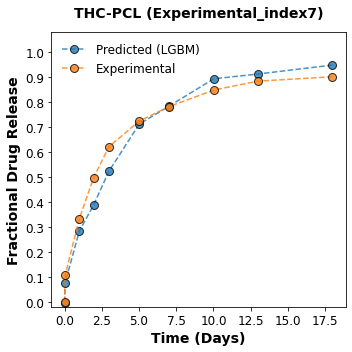

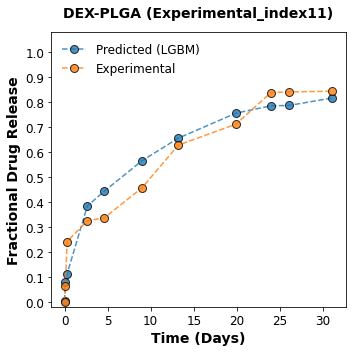

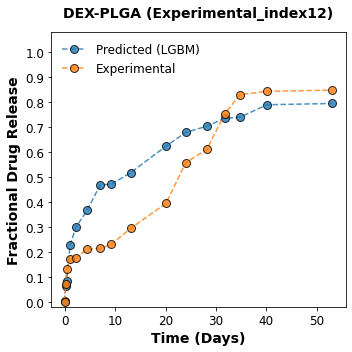

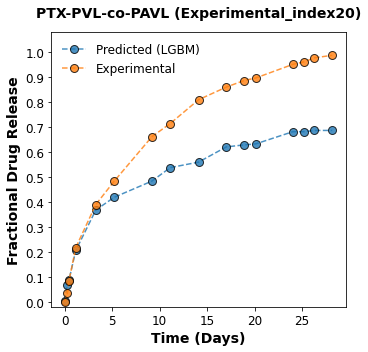

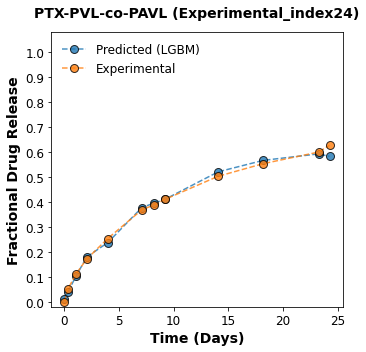

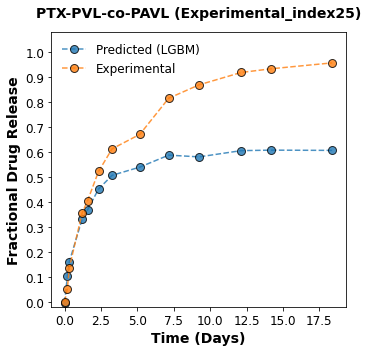

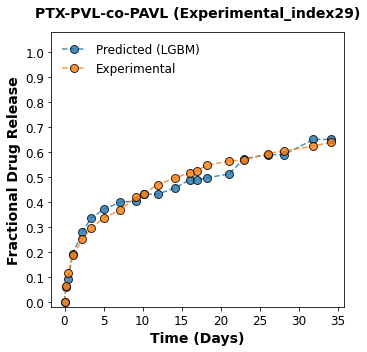

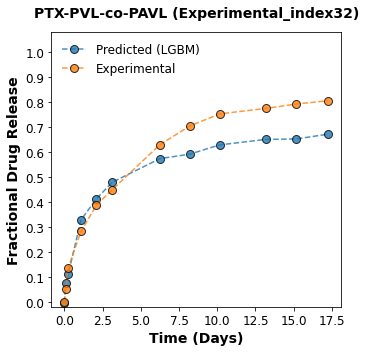

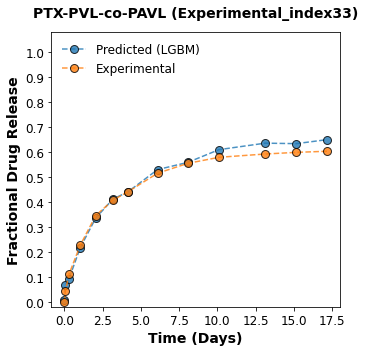

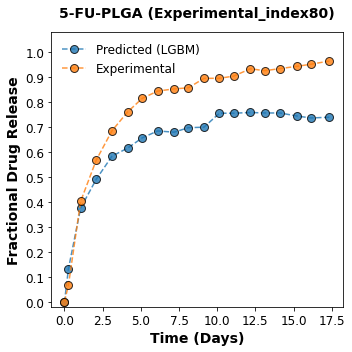

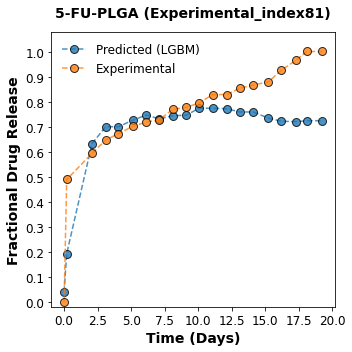

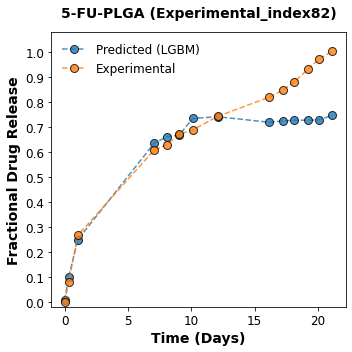

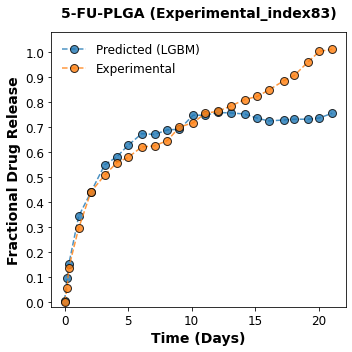

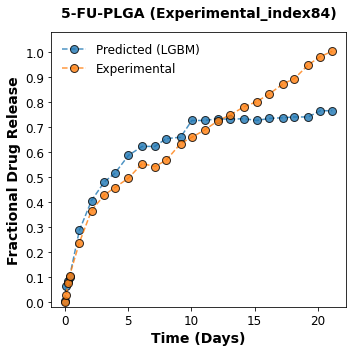

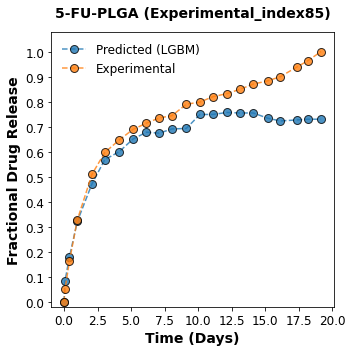

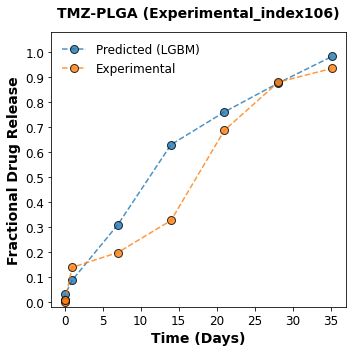

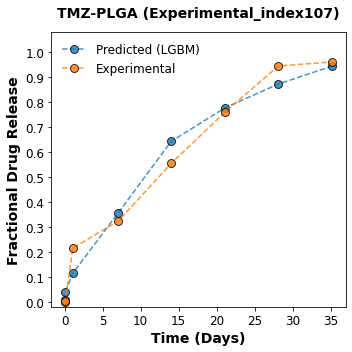

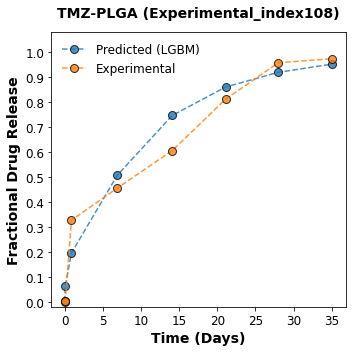

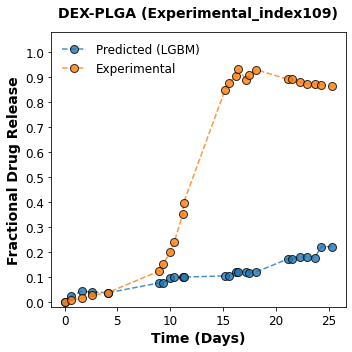

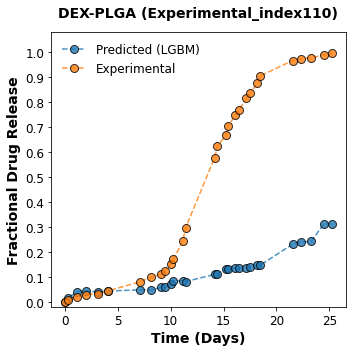

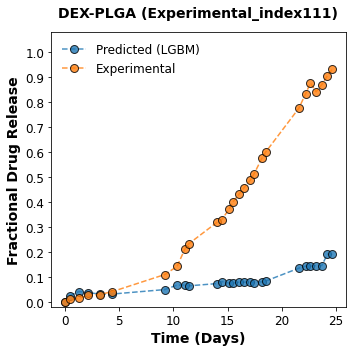

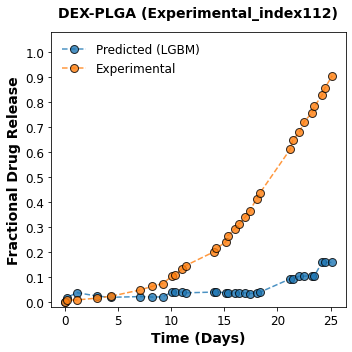

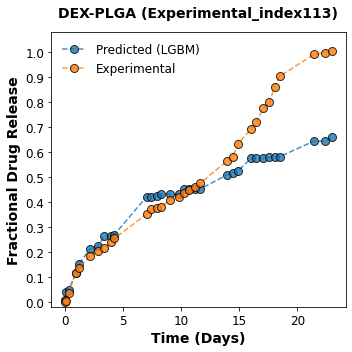

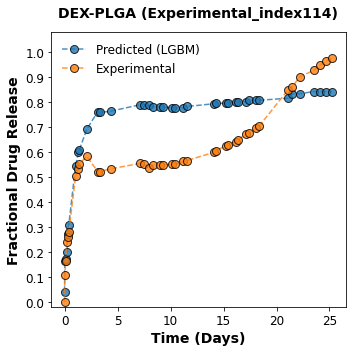

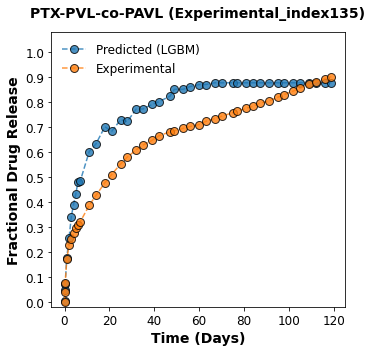

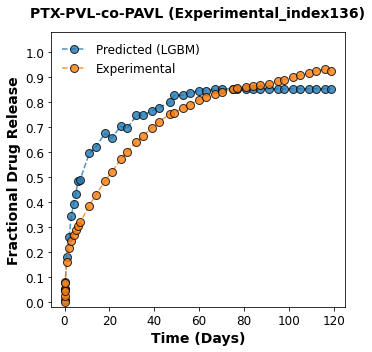

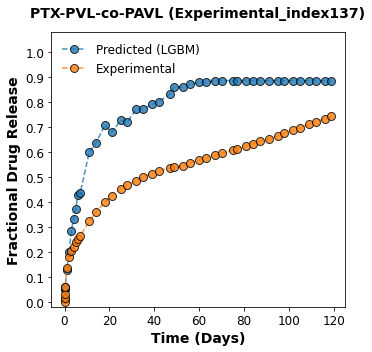

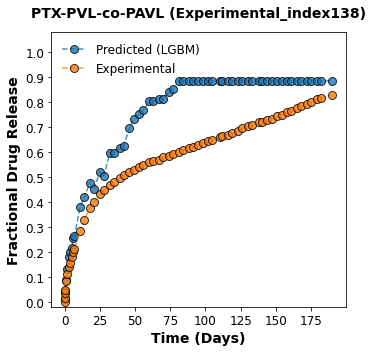

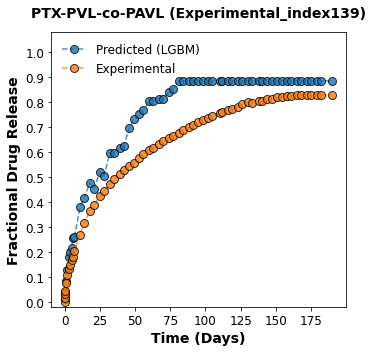

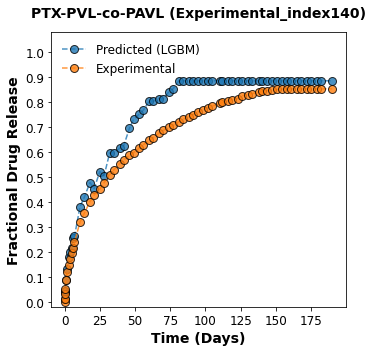

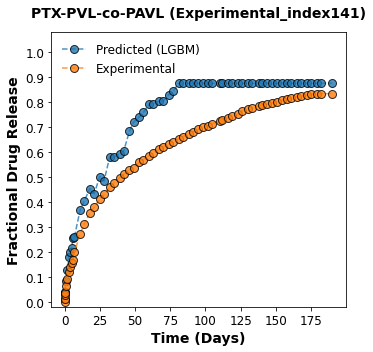

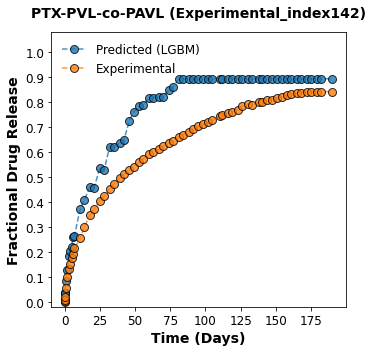

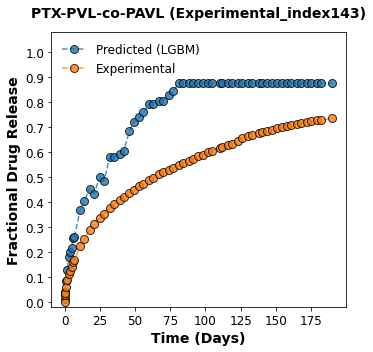

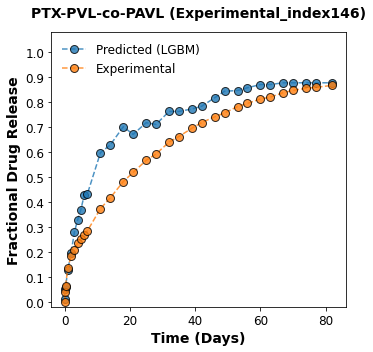

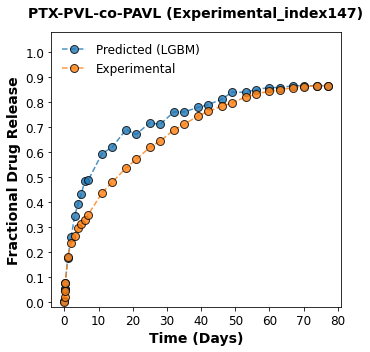

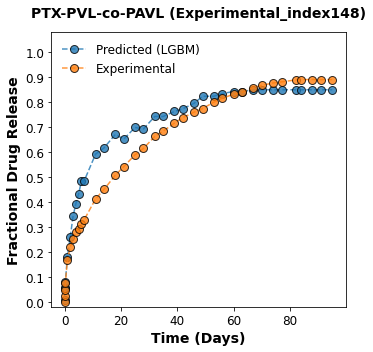

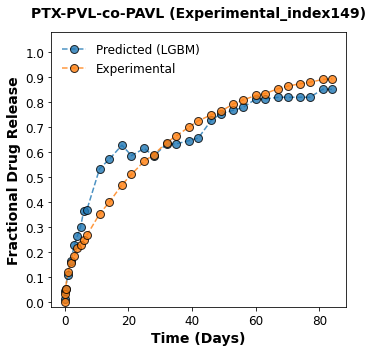

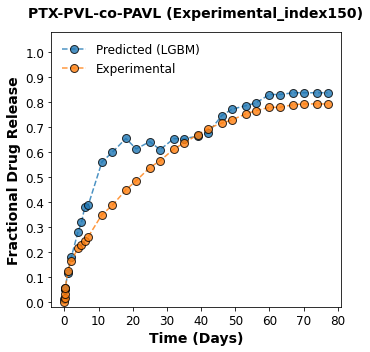

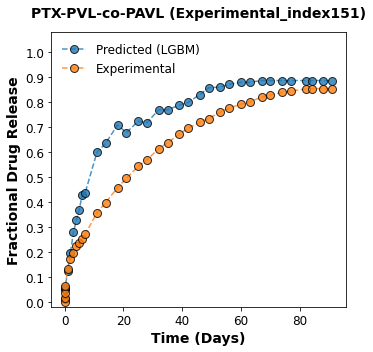

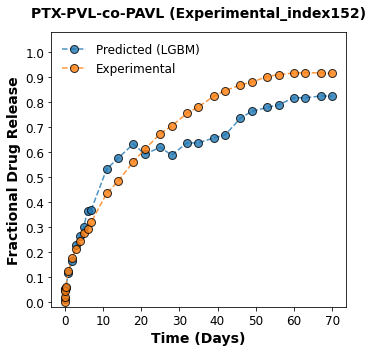

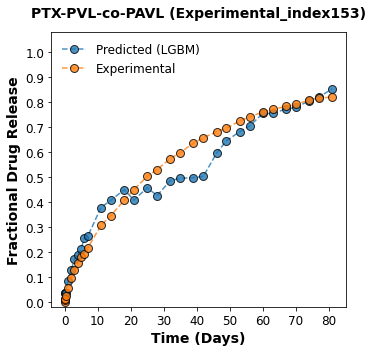

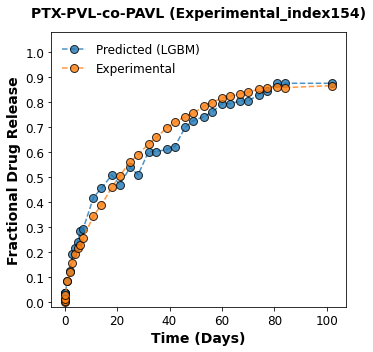

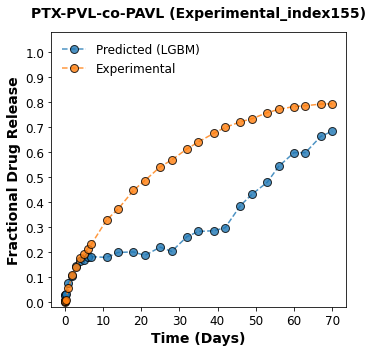

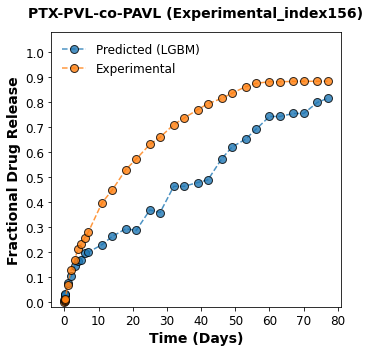

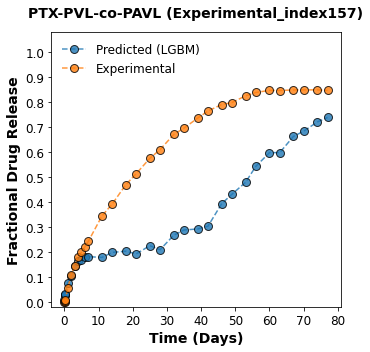

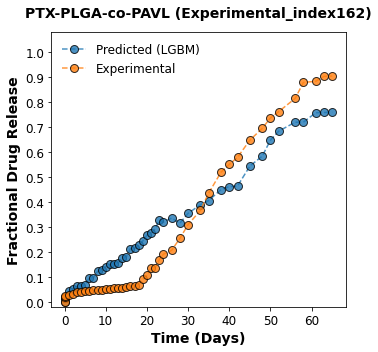

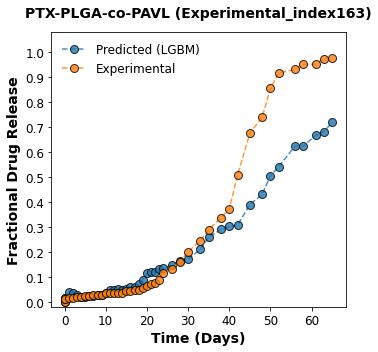

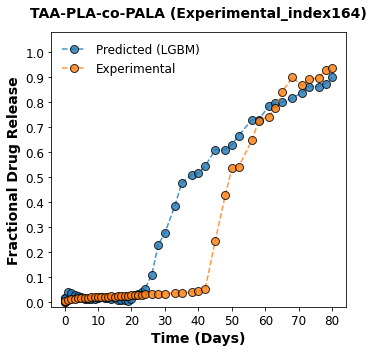

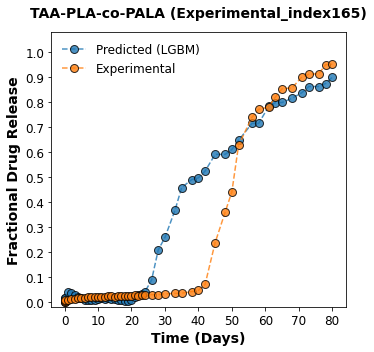

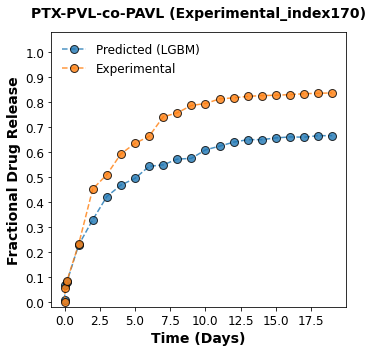

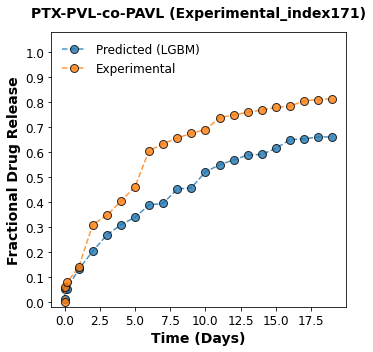

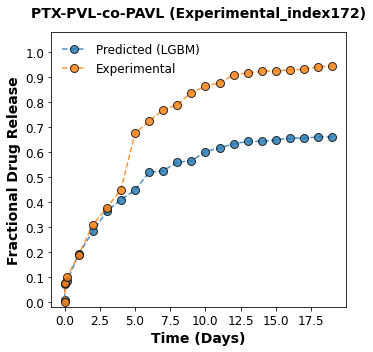

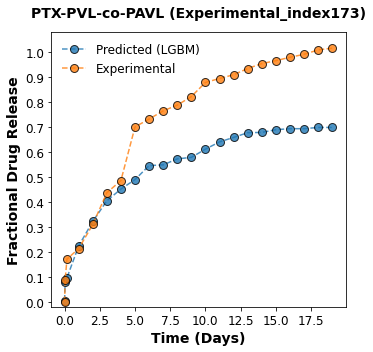

In [8]:
#group dataframe by experimental index
grouped = LGBM_test.groupby('Experimental Index')

#generate predicted versus experimental drug release profiles for the test set
for name, group in grouped:
    X1 = group['Time']
    Y1 = group['Predicted_Release']
    X2 = group['Time']
    Y2 = group['Experimental_Release']
    #Y1_err=group['Variance']
    
    dp = group['DP_Groups'].iloc[1]
    
    # Compute upper and lower bounds using chosen uncertainty measure: here
    # it is a fraction of the standard deviation of measurements at each
    # time point based on the unbiased sample variance
    #lower = Y1 - Y1_err
    #upper = Y1 + Y1_err

    fig, ax = plt.subplots(figsize=(5,5))
    
    ax.plot(X1, Y1, label='Predicted (LGBM)', linestyle='--', marker='o', markersize=8, 
            markeredgecolor="black", alpha=0.8)
    #ax.plot(X1, lower, color='tab:blue', alpha=0.2)
    #ax.plot(X1, upper, color='tab:blue', alpha=0.2)
    #ax.fill_between(X1, lower, upper, alpha=0.3, label='Variance')
    
    ax.plot(X2, Y2, label='Experimental', linestyle='--', marker='o', markersize=8, 
            alpha=0.8, markeredgecolor="black")
    
    
    # y-axis limits and interval
    ax.set(ylim=(-0.02, 1.08), yticks=np.arange(0,1.08,0.1))
    ax.set_xlabel('Time (Days)', fontsize=14, color = 'black', weight='bold')
    ax.set_ylabel('Fractional Drug Release', fontsize=14, color = 'black', weight='bold')
    ax.spines['top'].set_visible(True)
    ax.spines['right'].set_visible(True)
    ax.set_title(str(dp)+' (Experimental_index'+str(name)+')', color = 'black', weight='bold', 
                 fontsize=14, pad = 15)
    ax.legend(loc='upper left', frameon=False, prop={'size': 12})
    ax.grid(False)
    
    plt.yticks(fontsize=12)
    plt.xticks(fontsize=12)

    # x-axis and y-axis tick color
    ax.tick_params(colors='black')  # 'both' refers to minor and major axes
    
    plt.tight_layout()
    
    plt.savefig('Figures/Figure_3/LGBM_release_EXP-INDEX'+str(name)+"__2", dpi=600, format = 'png', transparent=False)
    
    #plt.show()